In [1]:
!pwd

/panda/eedy/ion_los-angle/s1_a064/notebook


In [2]:
from mintpy.objects import ramp
from mintpy.utils import ptime, readfile, writefile
import h5py
import numpy as np
from matplotlib import pyplot as plt, colorbar, ticker, colors
from mintpy.utils import ptime, readfile, writefile
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

In [3]:
path_split = '../mintpy_split_ion_upsample/geo/geo_ion-split.h5'
!reference_point.py ../mintpy_split_ion_upsample/geo/geo_ion-split.h5 -y 350 -x 100
!reference_date.py ../mintpy_split_ion_upsample/geo/geo_ion-split.h5 --ref-date 20190123
timeseries_split = readfile.read(path_split, datasetName='timeseries')[0]
timeseries_split = np.squeeze(timeseries_split)

mask_path_split = '../mintpy_split_ion_upsample/geo/geo_maskTempCoh.h5'
mask_split = readfile.read(mask_path_split, datasetName='mask')[0]
mask_split = np.squeeze(mask_split)

data_out, ramp = ramp.deramp(timeseries_split, mask_in=mask_split, ramp_type='linear', metadata=None, max_num_sample=1e3, coeff_file=None,ignore_zero_value=True)

def function(data, a, b, c):
    '''
    拟合曲面使用的函数
    '''
    x = data[0]
    y = data[1]
    return a*x+b*y + c



slope_ion_split = np.zeros(timeseries_split.shape[0])
slope_ion_split_dongxifangxiang = np.zeros(timeseries_split.shape[0])
slope_ion_split_nanbeifangxiang = np.zeros(timeseries_split.shape[0])
angle_deg_ion_split = np.zeros(timeseries_split.shape[0])
meta = readfile.read_attribute(path_split)
AZIMUTH_PIXEL_SIZE =  float(meta['AZIMUTH_PIXEL_SIZE'])
RANGE_PIXEL_SIZE = float(meta['RANGE_PIXEL_SIZE'])

for i in range(timeseries_split.shape[0]):
    x_data = ramp.shape[2]
    y_data = ramp.shape[1]
    X_data, Y_data = np.meshgrid(range(x_data), range(y_data))
    Z_data = ramp[i, :,:]
    
    x_data = X_data.flatten()
    y_data = Y_data.flatten()
    z_data = Z_data.flatten()
    
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
    print("The equation of the fit plane is: Z = {0} * X + {1} * Y + {2}".format(parameters[0],parameters[1],parameters[2]))
    
    Z_fit = function([X_data, Y_data], *parameters)
    
    # 计算梯度，考虑到横纵坐标的实际长度
    dx = parameters[1]/RANGE_PIXEL_SIZE
    dy = parameters[0]/AZIMUTH_PIXEL_SIZE
    # 计算梯度的大小和方向
    magnitude = np.hypot(dx, dy)  # 梯度的大小
    direction = np.degrees(np.arctan2(dy, dx)) + 90  # 梯度的方向，以x轴正半轴为0°，逆时针旋转为正方向
    direction = (direction + 360) % 360  # 将角度值限制在0°到360°之间

    slope_ion_split[i] = magnitude*1e8
    angle_deg_ion_split[i] = direction
    slope_ion_split_dongxifangxiang[i] = dy*1e8
    slope_ion_split_nanbeifangxiang[i] = dx*1e8

--------------------------------------------------
input reference point in y/x: (350, 100)
--------------------------------------------------
calculating the temporal average of timeseries file: ../mintpy_split_ion_upsample/geo/geo_ion-split.h5
reading timeseries data from file: ../mintpy_split_ion_upsample/geo/geo_ion-split.h5 ...
/home/eedy/tools/MintPy/src/mintpy/objects/stack.py:455: RuntimeWarning: Mean of empty slice
  dmean = np.nanmean(data, axis=0)
updating dataset values without re-writing to a new file
update metadata
input reference date: 20190123
--------------------------------------------------
change reference date for file: /panda/eedy/ion_los-angle/s1_a064/mintpy_split_ion_upsample/geo/geo_ion-split.h5
reading data ...
referencing in time ...
--------------------------------------------------
open  HDF5 file /panda/eedy/ion_los-angle/s1_a064/mintpy_split_ion_upsample/geo/geo_ion-split.h5 in r+ mode
writing dataset /timeseries                block: (0, 281, 0, 824, 0,

In [4]:
path_GIM = '../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5'
!reference_point.py ../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5 -y 350 -x 100
!reference_date.py ../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5 --ref-date 20190123
timeseries_GIM = readfile.read(path_GIM, datasetName='timeseries')[0]
timeseries_GIM = np.squeeze(timeseries_GIM)

mask_path_gim = '../mintpy_gim_ion_upsample/geo/geo_maskTempCoh.h5'
mask_gim = readfile.read(mask_path_gim, datasetName='mask')[0]
mask_gim = np.squeeze(mask_gim)

from mintpy.objects import ramp
data_out, ramp = ramp.deramp(timeseries_GIM, mask_in=mask_gim, ramp_type='linear', metadata=None, max_num_sample=1e3, coeff_file=None,ignore_zero_value=True)
def function(data, a, b, c):
    '''
    拟合曲面使用的函数
    '''
    x = data[0]
    y = data[1]
    return a*x+b*y + c



slope_ion_GIM = np.zeros(timeseries_GIM.shape[0])
slope_ion_GIM_dongxifangxiang = np.zeros(timeseries_GIM.shape[0])
slope_ion_GIM_nanbeifangxiang = np.zeros(timeseries_GIM.shape[0])
angle_deg_ion_GIM = np.zeros(timeseries_GIM.shape[0])
meta = readfile.read_attribute(path_GIM)
AZIMUTH_PIXEL_SIZE =  float(meta['AZIMUTH_PIXEL_SIZE'])
RANGE_PIXEL_SIZE = float(meta['RANGE_PIXEL_SIZE'])

for i in range(timeseries_GIM.shape[0]):
    x_data = ramp.shape[2]
    y_data = ramp.shape[1]
    X_data, Y_data = np.meshgrid(range(x_data), range(y_data))
    Z_data = ramp[i, :,:]
    
    x_data = X_data.flatten()
    y_data = Y_data.flatten()
    z_data = Z_data.flatten()
    
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
    print("The equation of the fit plane is: Z = {0} * X + {1} * Y + {2}".format(parameters[0],parameters[1],parameters[2]))
    
    Z_fit = function([X_data, Y_data], *parameters)
    
    # 计算梯度，考虑到横纵坐标的实际长度
    dx = parameters[1]/RANGE_PIXEL_SIZE
    dy = parameters[0]/AZIMUTH_PIXEL_SIZE
    # 计算梯度的大小和方向
    magnitude = np.hypot(dx, dy)  # 梯度的大小
    direction = np.degrees(np.arctan2(dy, dx)) + 90  # 梯度的方向，以x轴正半轴为0°，逆时针旋转为正方向
    direction = (direction + 360) % 360  # 将角度值限制在0°到360°之间


    slope_ion_GIM[i] = magnitude*1e8
    angle_deg_ion_GIM[i] = direction
    slope_ion_GIM_dongxifangxiang[i] = dy*1e8
    slope_ion_GIM_nanbeifangxiang[i] = dx*1e8


--------------------------------------------------
input reference point in y/x: (350, 100)
--------------------------------------------------
calculating the temporal average of timeseries file: ../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5
reading timeseries data from file: ../mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5 ...
/home/eedy/tools/MintPy/src/mintpy/objects/stack.py:455: RuntimeWarning: Mean of empty slice
  dmean = np.nanmean(data, axis=0)
updating dataset values without re-writing to a new file
update metadata
input reference date: 20190123
--------------------------------------------------
change reference date for file: /panda/eedy/ion_los-angle/s1_a064/mintpy_gim_ion_upsample/geo/geo_ion-GIM.h5
input refDate is the same as the existing REF_DATE.
Nothing to be done.
time used: 00 mins 1.0 secs.
The equation of the fit plane is: Z = 9.18645951946423e-05 * X + 0.00010174410336695376 * Y + -0.04292472042428144
The equation of the fit plane is: Z = 8.137177283458465e-05 * X +

In [5]:
with h5py.File(path_GIM, 'r') as file:
    date_GIM = file['date']
    date_GIM = date_GIM[()]
date_GIM = np.char.decode(date_GIM)

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

slope_ion_GIM_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_GIM_correct[i] = slope_ion_GIM[j[0]]
slope_ion_GIM = slope_ion_GIM_correct

angle_deg_ion_GIM_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        angle_deg_ion_GIM_correct[i] = angle_deg_ion_GIM[j[0]]
angle_deg_ion_GIM = angle_deg_ion_GIM_correct

slope_ion_GIM_dongxifangxiang_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_GIM_dongxifangxiang_correct[i] = slope_ion_GIM_dongxifangxiang[j[0]]
slope_ion_GIM_dongxifangxiang = slope_ion_GIM_dongxifangxiang_correct

slope_ion_GIM_nanbeifangxiang_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_GIM_nanbeifangxiang_correct[i] = slope_ion_GIM_nanbeifangxiang[j[0]]
slope_ion_GIM_nanbeifangxiang = slope_ion_GIM_nanbeifangxiang_correct

In [6]:
path_hight_GIM = '../mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5'
!reference_point.py ../mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5 -y 350 -x 100
!reference_date.py ../mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5 --ref-date 20190123
timeseries_hight_GIM = readfile.read(path_hight_GIM, datasetName='timeseries')[0]
timeseries_hight_GIM = np.squeeze(timeseries_hight_GIM)

mask_path_hight_gim = '../mintpy_hight_gim_ion_upsample/geo/geo_maskTempCoh.h5'
mask_hight_gim = readfile.read(mask_path_hight_gim, datasetName='mask')[0]
mask_hight_gim = np.squeeze(mask_hight_gim)

from mintpy.objects import ramp
data_out, ramp = ramp.deramp(timeseries_hight_GIM, mask_in=mask_hight_gim, ramp_type='linear', metadata=None, max_num_sample=1e3, coeff_file=None,ignore_zero_value=True)
def function(data, a, b, c):
    '''
    拟合曲面使用的函数
    '''
    x = data[0]
    y = data[1]
    return a*x+b*y + c



slope_ion_hight_GIM = np.zeros(timeseries_hight_GIM.shape[0])
slope_ion_hight_GIM_dongxifangxiang = np.zeros(timeseries_hight_GIM.shape[0])
slope_ion_hight_GIM_nanbeifangxiang = np.zeros(timeseries_hight_GIM.shape[0])
angle_deg_ion_hight_GIM = np.zeros(timeseries_hight_GIM.shape[0])
meta = readfile.read_attribute(path_hight_GIM)
AZIMUTH_PIXEL_SIZE =  float(meta['AZIMUTH_PIXEL_SIZE'])
RANGE_PIXEL_SIZE = float(meta['RANGE_PIXEL_SIZE'])

for i in range(timeseries_hight_GIM.shape[0]):
    x_data = ramp.shape[2]
    y_data = ramp.shape[1]
    X_data, Y_data = np.meshgrid(range(x_data), range(y_data))
    Z_data = ramp[i, :,:]
    
    x_data = X_data.flatten()
    y_data = Y_data.flatten()
    z_data = Z_data.flatten()
    
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
    print("The equation of the fit plane is: Z = {0} * X + {1} * Y + {2}".format(parameters[0],parameters[1],parameters[2]))
    
    Z_fit = function([X_data, Y_data], *parameters)
    
    # 计算梯度，考虑到横纵坐标的实际长度
    dx = parameters[1]/RANGE_PIXEL_SIZE
    dy = parameters[0]/AZIMUTH_PIXEL_SIZE
    # 计算梯度的大小和方向
    magnitude = np.hypot(dx, dy)  # 梯度的大小
    direction = np.degrees(np.arctan2(dy, dx)) + 90  # 梯度的方向，以x轴正半轴为0°，逆时针旋转为正方向
    direction = (direction + 360) % 360  # 将角度值限制在0°到360°之间


    slope_ion_hight_GIM[i] = magnitude*1e8
    angle_deg_ion_hight_GIM[i] = direction
    slope_ion_hight_GIM_dongxifangxiang[i] = dy*1e8
    slope_ion_hight_GIM_nanbeifangxiang[i] = dx*1e8

--------------------------------------------------
input reference point in y/x: (350, 100)
--------------------------------------------------
calculating the temporal average of timeseries file: ../mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5
reading timeseries data from file: ../mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5 ...
/home/eedy/tools/MintPy/src/mintpy/objects/stack.py:455: RuntimeWarning: Mean of empty slice
  dmean = np.nanmean(data, axis=0)
updating dataset values without re-writing to a new file
update metadata
input reference date: 20190123
--------------------------------------------------
change reference date for file: /panda/eedy/ion_los-angle/s1_a064/mintpy_hight_gim_ion_upsample/geo/geo_ion-hight-GIM.h5
input refDate is the same as the existing REF_DATE.
Nothing to be done.
time used: 00 mins 1.0 secs.
The equation of the fit plane is: Z = 0.00011800907867847922 * X + 7.881373197383181e-05 * Y + -0.037942431062309934
The equation of the fit pla

In [7]:
with h5py.File(path_hight_GIM, 'r') as file:
    date_hight_GIM = file['date']
    date_hight_GIM = date_hight_GIM[()]
date_hight_GIM = np.char.decode(date_hight_GIM)

with h5py.File(path_split, 'r') as file:
    date_split = file['date']
    date_split = date_split[()]
date_split = np.char.decode(date_split)

slope_ion_hight_GIM_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_hight_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_hight_GIM_correct[i] = slope_ion_hight_GIM[j[0]]
slope_ion_hight_GIM = slope_ion_hight_GIM_correct

angle_deg_ion_hight_GIM_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_hight_GIM == date_split[i])[0]
    if len(j) > 0:
        angle_deg_ion_hight_GIM_correct[i] = angle_deg_ion_hight_GIM[j[0]]
angle_deg_ion_hight_GIM = angle_deg_ion_hight_GIM_correct

slope_ion_hight_GIM_dongxifangxiang_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_hight_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_hight_GIM_dongxifangxiang_correct[i] = slope_ion_hight_GIM_dongxifangxiang[j[0]]
slope_ion_hight_GIM_dongxifangxiang = slope_ion_hight_GIM_dongxifangxiang_correct

slope_ion_hight_GIM_nanbeifangxiang_correct = np.zeros(len(date_split))
for i in range(len(date_split)):
    j = np.where(date_hight_GIM == date_split[i])[0]
    if len(j) > 0:
        slope_ion_hight_GIM_nanbeifangxiang_correct[i] = slope_ion_hight_GIM_nanbeifangxiang[j[0]]
slope_ion_hight_GIM_nanbeifangxiang = slope_ion_hight_GIM_nanbeifangxiang_correct

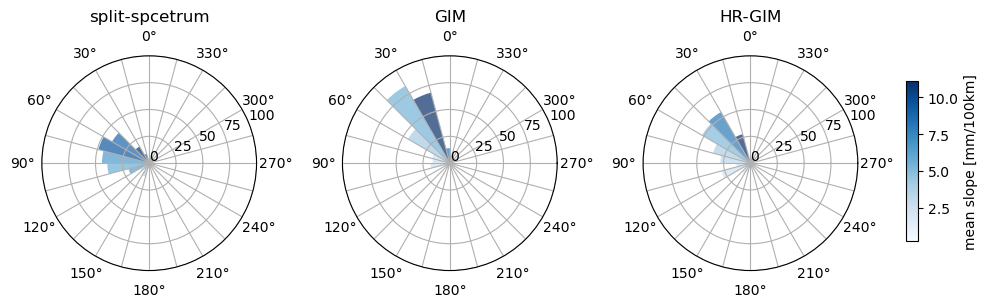

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.stats import binned_statistic

# 转换为弧度
ion_split_angle_deg_rad = np.deg2rad(angle_deg_ion_split)
ion_GIM_angle_deg_rad = np.deg2rad(angle_deg_ion_GIM)
ion_hight_GIM_angle_deg_rad = np.deg2rad(angle_deg_ion_hight_GIM)

# 定义函数来绘制极坐标直方图
def plot_polar_hist(ax, angle_rad, slope, title):
    # 计算每个bin中的均值
    bin_means, bin_edges, _ = binned_statistic(angle_rad, slope, statistic='mean', bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12))

    # 从蓝色颜色图中取颜色，bin_means / bin_means.max() 使均值在 0-1 之间，以便映射到颜色的深浅
    norm = plt.Normalize(np.nanmin(bin_means), np.nanmax(bin_means))
    colors = plt.get_cmap('Blues')(norm(bin_means))

    # 绘制直方图，颜色由均值决定
    n, bins, patches = ax.hist(angle_rad, bins=np.arange(0, 2*np.pi+np.pi/12, np.pi/12), alpha=0.7)

    # 设置x轴标签为0-360度
    ax.set_xticks(np.arange(0, 2*np.pi, np.pi/12))
    ax.set_xticklabels(['270°','', '300°','', '330°','' ,'0°','', '30°','', '60°','', '90°','', '120°','', '150°','', '180°','', '210°','', '240°',''])

    # 设置直方图的颜色
    for i in range(len(patches)):
        patches[i].set_facecolor(colors[i])

    ax.grid(True)  # 显示网格线

    # 在径向上添加长度刻度
    ax.set_yticks(np.linspace(0, 100, 5))

    ax.set_title(title)

    return bin_means

# 创建包含三个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(12, 4), subplot_kw=dict(polar=True))  # 增加图形高度

# 调整子图间距和边距
fig.subplots_adjust(left=0.1,    # 左边距
                    right=0.78,  # 右边距（给colorbar留空间）
                    wspace=0.4)  # 子图水平间距

# 绘制三个极坐标直方图（保持不变）
bin_means_split = plot_polar_hist(axes[0], ion_split_angle_deg_rad, slope_ion_split, 'split-spcetrum')
bin_means_GIM = plot_polar_hist(axes[1], ion_GIM_angle_deg_rad, slope_ion_GIM, 'GIM')
bin_means_hight_GIM = plot_polar_hist(axes[2], ion_hight_GIM_angle_deg_rad, slope_ion_hight_GIM, 'HR-GIM')

# 合并数据并创建颜色映射（保持不变）
all_bin_means = np.concatenate([bin_means_split, bin_means_GIM, bin_means_hight_GIM])
norm = plt.Normalize(np.nanmin(all_bin_means), np.nanmax(all_bin_means))
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])

# 添加颜色条（新增位置参数）
cax = fig.add_axes([0.82, 0.3, 0.01, 0.4])  # 参数格式：[左, 下, 宽, 高]
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('mean slope [mm/100km]')
plt.savefig('ion_ramp.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()